In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import json
import os

In [2]:
s = 12  # Estacionalidad de 12 meses

In [3]:
train = pd.read_csv('../data/processed/train.csv')
test = pd.read_csv('../data/processed/test.csv')

In [6]:
train.index = pd.to_datetime(train['datesold'])
test.index = pd.to_datetime(test['datesold'])

,datesold,price
datesold,,
2007-03-01,2007-03-01,0.256799
2007-04-01,2007-04-01,0.385259
2007-05-01,2007-05-01,0.000001
2007-06-01,2007-06-01,0.177559
2007-07-01,2007-07-01,0.567074
...,...,...
2018-03-01,2018-03-01,0.165845
2018-04-01,2018-04-01,0.186156
2018-05-01,2018-05-01,0.137966


In [8]:
modelo_ses = sm.tsa.SimpleExpSmoothing(
    train['price'],
    initialization_method="estimated"
).fit()

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
pred = modelo_ses.forecast(steps=s)

In [11]:
mae = mean_absolute_error(test['price'], pred)
rmse = np.sqrt(mean_squared_error(test['price'], pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.028457400752152306
RMSE: 0.03451664862307802


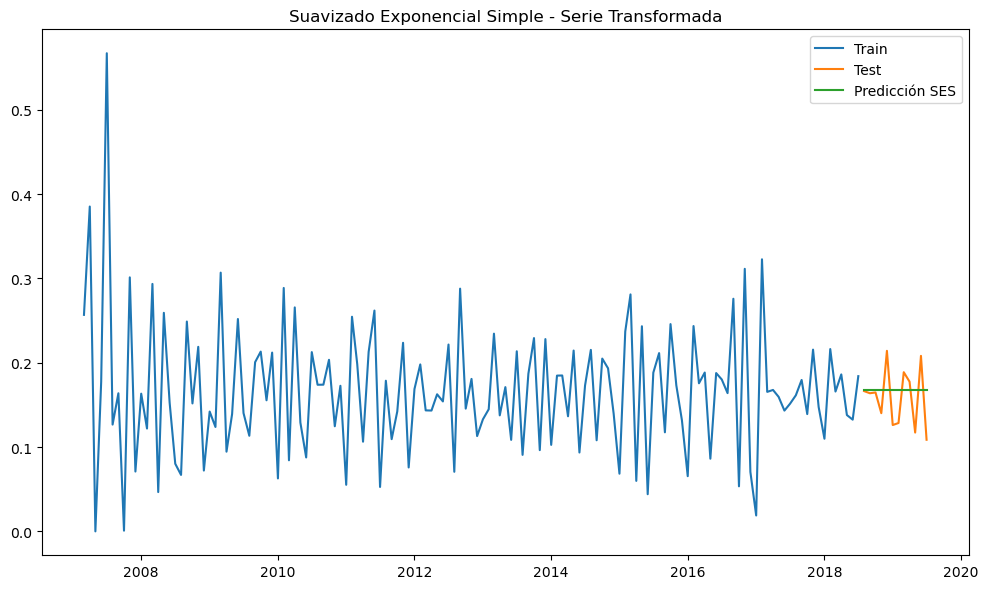

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(train['price'], label="Train")
plt.plot(test['price'], label="Test")
plt.plot(pred, label="Predicción SES")

plt.legend()
plt.title("Suavizado Exponencial Simple - Serie Transformada")
plt.tight_layout()